# 🏂 Holt Winters Model (Linear Version)
Hey!! <br>
This is the **Hold Model**. At least the *starting* version of it. You know, you were used to *freak out* by reading this H O L T name? But after learning the nitty gritty of it, it is like a toy which was waiting for me to get un-wrapped.

Here, we are on the **Trend, But no Seasonality** type of situation unlike SES where there was *no trend* and *no seasonality* either.

### 🤷‍♂️ But why Winters?
Now obviously you will get this doubt that *there can be a name like **holt** but, what about **winters** part? Does that show some kind of seasonality*? Hah, looking on the internet:

> Holt-Winter's Exponential Smoothing as named after its **two contributors**: Charles ***Holt*** and Peter ***Winter's*** is one of the oldest time series analysis techniques which takes into account the trend and seasonality while doing the forecasting.

અરે યાર, winters કોઈનો નામ પણ હોય! 🙄

### 

### 🕶 Revision of SES
Recall that in SES, we used total of **`2`** models.

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = l_t $$

#### 2️⃣ Smoothing Equation
# $$l_t = \alpha y_t + (1 - \alpha)l_{t - 1}$$

It was where, the 1️⃣ is the **actual** equation which will **give the final** result and 2️⃣ was the **underlying** equation which calculates the stuff. And that we called the level. **And that,** level ***is*** the **intercept**.

###### 

### ⛄ Getting Started with Holt Winters
Here, we have the same thing as SES just that it **has one more number to learn** which is **the trend**. This model will return the trend line which can go in any direction instead of simply the flat-horizontal simple line seen in SES.

And a line? Well... ***how to draw a freakin' line?***

Man! It is the same as **linear regression**!! As just we know how to calculate the **intercept** (level) now just we will need to learn about learning the **slope** (trend). That's it. And that will be our 3️⃣ equation. 

Of course the equations will change slightly, but not much. Let's get to them step-by-step.

###### 

### ❄ Model in the component form

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = l_t + (b_t \times h) $$

- Look at the equation, doesn't that look familiar? It is! It is the same as for the line in the linear regression: $\hat y = \beta_0 + (\beta_1 \times x_i)$.
- So, that's the little change in the things that we care about. As instead of the simple horizontal line, we now have the essence of the trend (overall).
- $l_t:$ represents the **level** (intercept)
- $b_t:$ represents the **trend** (slope)
- $h:$ represents `th` point in the future to predict 1, 2, 3, ...

#### 2️⃣ Level Equation
# $$l_t = \alpha y_t + (1 - \alpha)(l_{t - 1} + b_{t - 1})$$

- Just try to compare it with the previous SES version of the equation: $l_t = \alpha y_t + (1 - \alpha)l_{t - 1}$
- The thing is the same, the *later part* on the right side shows the smoothed version of the previous value, but **since** we are using more than 1 component in the model (which is a trend as well), we would now have to add that.
- And **note that** the $(l_{t - 1} + b_{t - 1})$ ***is actually*** $(l_{t - 1} + (b_{t - 1} \times 1))$ or say `h = 1` one point ahead in time — and since 1 has no meaning, we will remove it.

#### 3️⃣ Trend Equation
# $$b_t = \beta(l_t - l_{t - 1}) + (1 - \beta)b_{t - 1}$$

- We are **still using** the same form of the equation but with *slight* modification according to the model.
- The story of $(l_t - l_{t - 1})$
    - We find the slope generally with $\frac{l_t - l_{t - 1}}{1}$
    - $l_t:$ the value of current time
    - $l_{t - 1}:$ the value of previous time
    - Where the `1` in the denomenator represents the time frame — period
    - Just learning the slope in the gap of 1 day, 1 month... it is 1.
    - So that can be removed from the equation.
- We are taking the slope of single-single data into account to build the general trend.

### 

## 👓 Holt in Action

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

from statsmodels.tsa.holtwinters import Holt

In [3]:
# Reading the same data
passengers = pd.read_csv("../data/airline_passengers.csv", index_col=0, parse_dates=True)
passengers.index.freq = "MS"

In [4]:
# Building the model
holt = Holt(passengers, initialization_method="legacy-heuristic")

In [5]:
holt

In [12]:
# Note that we are nither giving the alpha nor the optimize
# as we want to get the minimized error
results = holt.fit()

In [13]:
results.params

{'smoothing_level': 0.9950208833037283,
 'smoothing_trend': 0.0042554614726079635,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 111.95033674531331,
 'initial_trend': 1.4737669963584779,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

getting the same alpha($\alpha$) : `0.995` **&** also the beta($\beta$) : `0.004`.

And, the real numbers that will be used in will be: 
- Level ($l_t$): `111.950`
- Trend ($b_t$): `1.473`

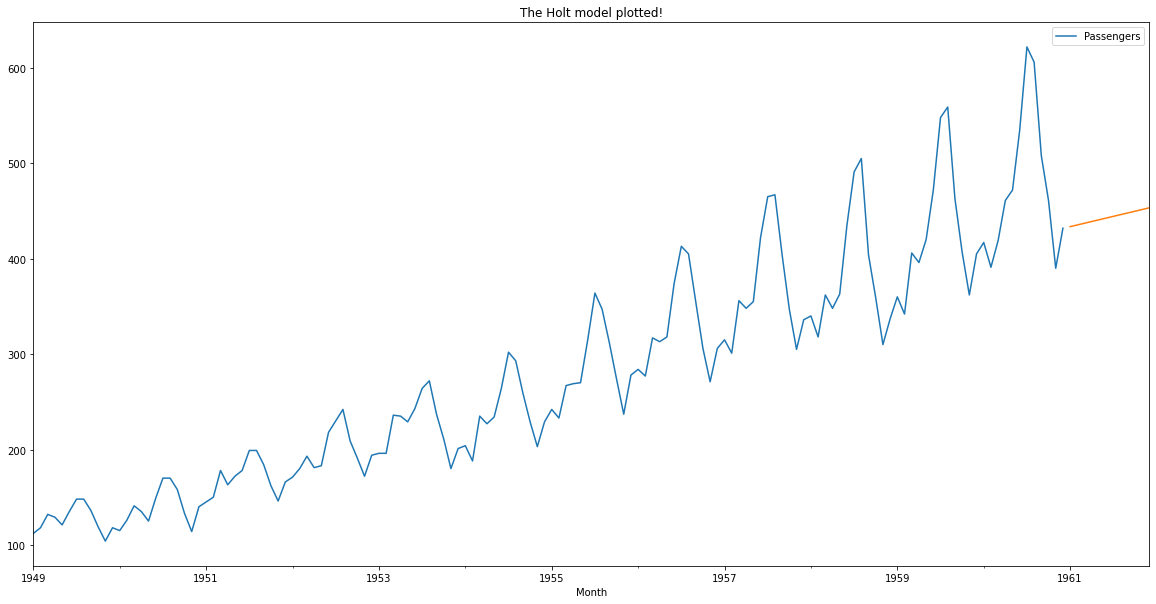

In [25]:
passengers.plot()
results.forecast(12).plot()
plt.title("The Holt model plotted!");

### 😙 Let's do it manually

# $$l_t = \alpha y_t + (1 - \alpha)(l_{t - 1} + b_{t - 1})$$

# $$b_t = \beta(l_t - l_{t - 1}) + (1 - \beta)b_{t - 1}$$

BAKI CHHE

In [31]:
alpha = 0.9950208833037283
beta = 0.0042554614726079635
lts = []
bts = []
ys = []
ys.append(passengers.iloc[0]) # very first value

for x_t in passengers.Passengers.values[1:]:
    l_t = alpha*x_t + (1 - alpha)*ys[-1]
    b_t = beta*(l_t - ys[-1]) + (1 - beta)
    EWMeans.append(new_mean)